# Жиделев Сергей
# РИ-401002
# Лабораторная работа № 2

In [106]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
%matplotlib inline

2 задание

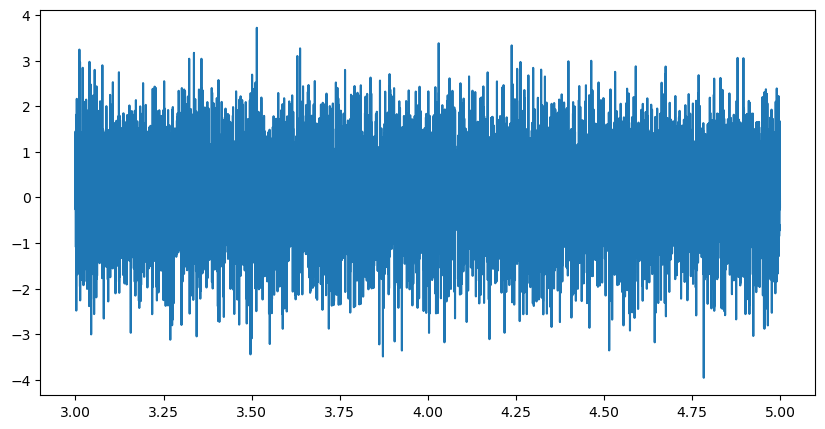

In [107]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

3 задание

In [108]:
import statsmodels.api as sm

def kpss(x, nlags = 'auto'):
    return sm.tsa.stattools.kpss(x, nlags = 'auto')

kpss(x)

C:\Users\shinigami\AppData\Local\Temp\ipykernel_7728\3157209519.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return sm.tsa.stattools.kpss(x, nlags = 'auto')


(0.0522827125541269,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

По значению pvalue следует принять нулевую гипотезу о том, что ряд стационарен.

7-8 задание

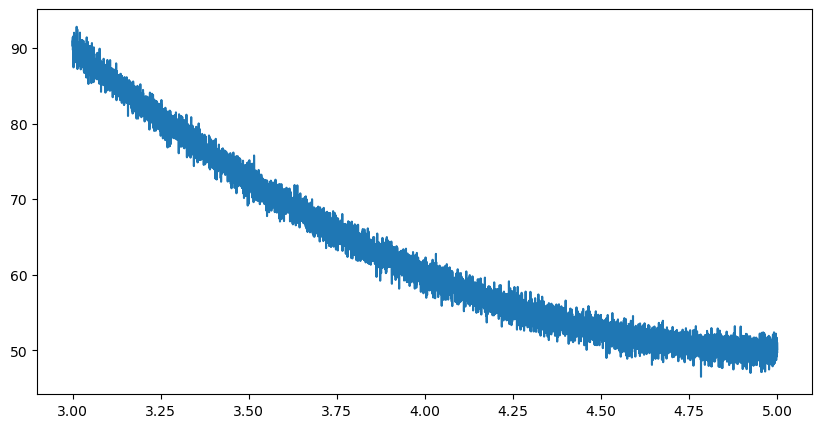

In [109]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

In [110]:
kpss(xv)

C:\Users\shinigami\AppData\Local\Temp\ipykernel_7728\3157209519.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  return sm.tsa.stattools.kpss(x, nlags = 'auto')


(15.970908438386264,
 0.01,
 59,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Значение pvalue равно 0.01, что явно меньше порога в 0.05, следовательно нужно отклонить нулевую гипотезу о стационарности ряда.

9 задание

In [111]:
x1, x2 = x[:len(x)//2], x[len(x)//2:]
xv1, xv2 = xv[:len(xv)//2], xv[len(xv)//2:]

for i in [stats.f_oneway(x1, x2), stats.f_oneway(xv1, xv2)]:
    print(i)

F_onewayResult(statistic=0.5830184424909853, pvalue=0.44514963113002215)
F_onewayResult(statistic=23055.115431698687, pvalue=0.0)


По результатам критерия Фишера можно сделать следующие заключения:

1) В случае с нормальным распределением, значение pvalue оказалось больше порога в 0.5, следовательно можно сделать вывод, что данные ряды принадлежат к одному распределению, поскольку их дисперсии равны

2) Во втором же случае, значение pvalue оказалось равно 0.0, следует отклонить нулевую гипотезу. 

11 задание

In [112]:
for i in [stats.ttest_ind(x1, x2), stats.ttest_ind(xv1, xv2)]:
    print(i)

Ttest_indResult(statistic=-0.7635564435527902, pvalue=0.4451496311306694)
Ttest_indResult(statistic=151.83911034940462, pvalue=0.0)


По результатам критерия Стьюдента можно сделать следующие заключения:

1) В случае с нормальным распределением, значение pvalue оказалось больше порога в 0.5, следовательно можно сделать вывод, что данные ряды принадлежат к одному распределению

2) Во втором же случае, значение pvalue оказалось равно 0.0, следует отклонить нулевую гипотезу.

13 задание

In [113]:
for i in [stats.skewtest(x), stats.skewtest(xv), stats.ks_2samp(x1, x2), stats.ks_2samp(xv1, xv2)]:
    print(i, end = '\n\n')

SkewtestResult(statistic=-1.3574897723935897, pvalue=0.17462564101313638)

SkewtestResult(statistic=23.76983404255695, pvalue=6.852822661074359e-125)

KstestResult(statistic=0.022, pvalue=0.1777267837309908, statistic_location=0.013582640589534031, statistic_sign=1)

KstestResult(statistic=0.957, pvalue=0.0, statistic_location=60.001927063866184, statistic_sign=-1)



Skewtest - эта функция проверяет нулевую гипотезу о том, что асимметрия совокупности, из которой была взята выборка, такая же, как и у соответствующего нормального распределения.

ks_2samp - тест Колмогорова-Смирнова используется для проверки того, происходит ли выборка из определенного распределения.

По результатам можно сказать, что в случае с нормальным распределением оба теста говорят о том, что нулевая гипотеза должна быть принята, однако нельзя сказать то же самое о равномерном распределении, значение pvalue в данных тестах значительно ниже порогов для этих тестов.

14 задание

In [114]:
x = rand.randn(10000)
y = rand.rand(10000)


print(f'Мат. ожидание x: {np.mean(x)}, Мат. ожидание y: {np.mean(y)}')

stats.ttest_ind(x, y)

Мат. ожидание x: -0.011491747498527473, Мат. ожидание y: 0.497343914275242


Ttest_indResult(statistic=-48.58400908143002, pvalue=0.0)

16 задание

In [115]:
xm = rand.randn(10000)
ym = rand.rand(10000)-0.5
stats.ttest_ind(xm, ym)

Ttest_indResult(statistic=-1.2601158626612894, pvalue=0.20764227281126765)

17 задание

In [116]:
from scipy.stats import norm

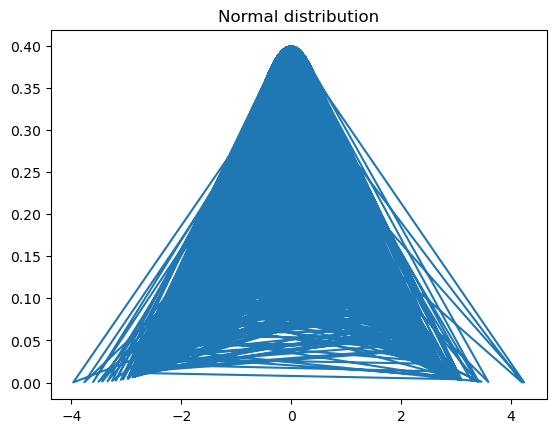

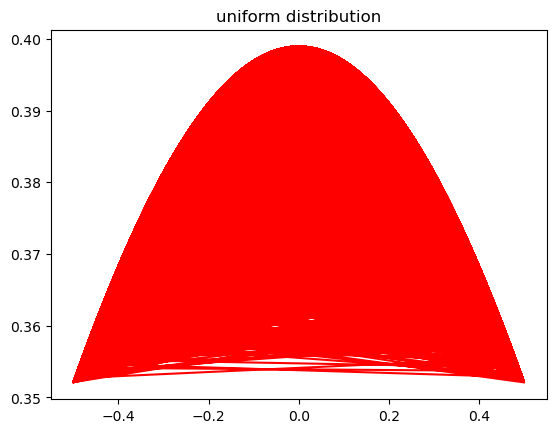

Ttest_indResult(statistic=2.1431762123660874, pvalue=0.032110980610618324)


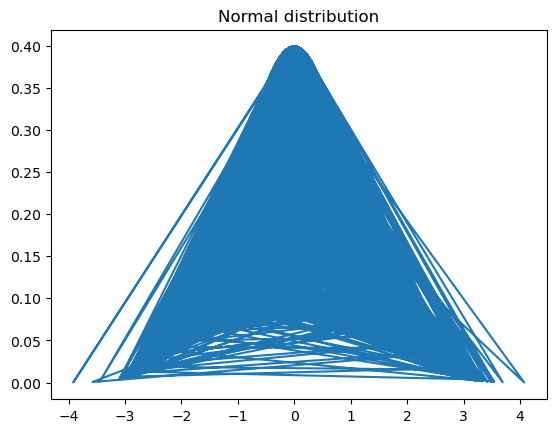

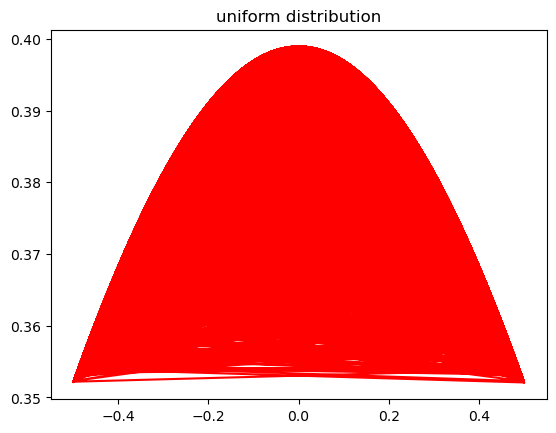

Ttest_indResult(statistic=-0.5834455228764196, pvalue=0.5595999998273858)


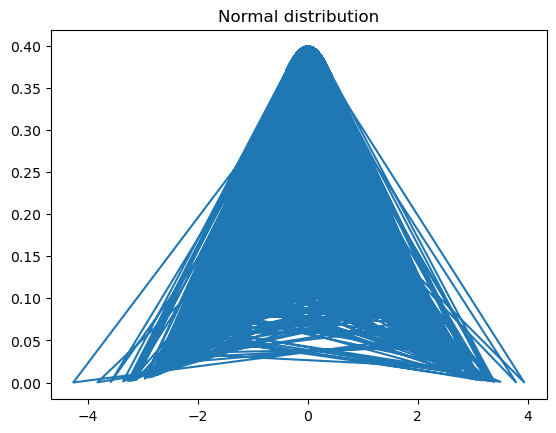

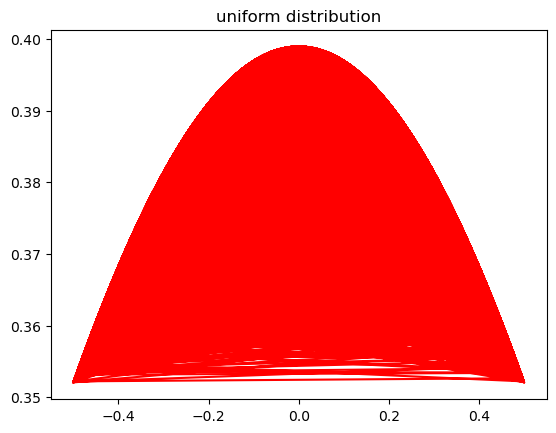

Ttest_indResult(statistic=0.34768054266368237, pvalue=0.7280837699528464)


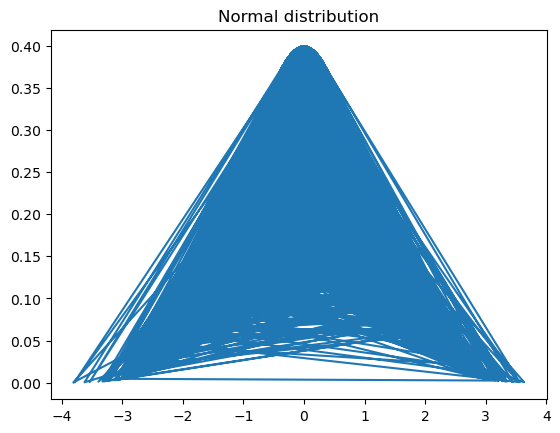

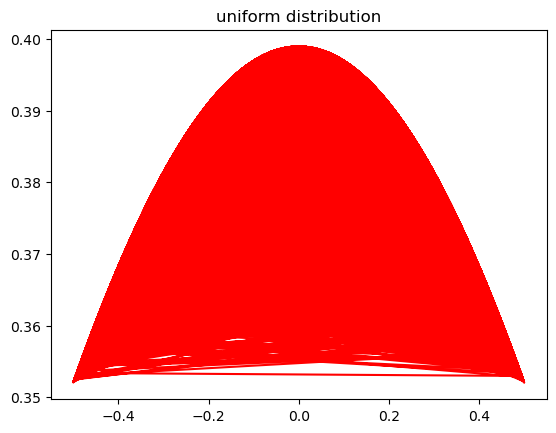

Ttest_indResult(statistic=0.01736740167523194, pvalue=0.9861436881835439)


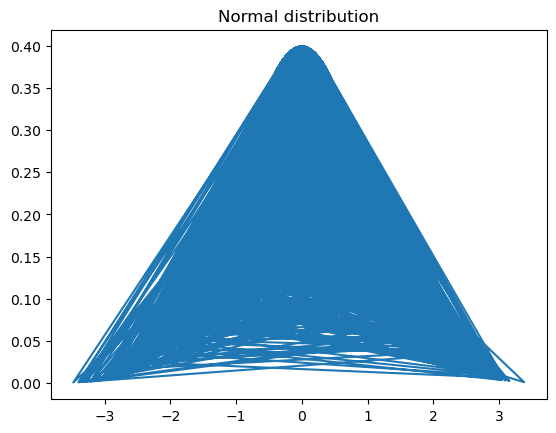

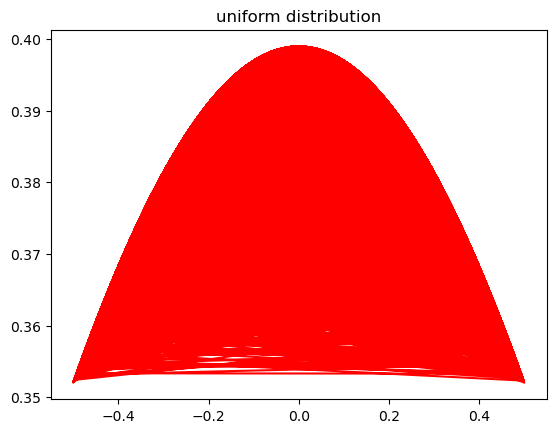

Ttest_indResult(statistic=0.3397638271096578, pvalue=0.7340379589833368)


In [117]:
def ttest(x, y):
    return stats.ttest_ind(x, y)

for i in range(5):
    xm = rand.randn(10000)
    ym = rand.rand(10000) - 0.5
    plt.plot(xm, norm.pdf(xm))
    plt.title('Normal distribution')
    plt.show()
    plt.plot(ym, norm.pdf(ym, 0, 1), c = 'red')
    plt.title('uniform distribution')
    plt.show()
    
    print(ttest(xm, ym), end = '\n')


Как можно заметить после нескольких статистических тестов, значение pvalue непостоянно, что может говорить о том, что математические ожидания нормальной выборки и равномерной выборки отличаются из-за структурных различий и свойств их распределений. Сдвинув равномерную выборку на 0.5 влево, удалось получить мат. ожидание близкое к 0, что собственно и должно получаться у нормально распределения, однако это еще не означает, что нулевую гипотезу стоит принимать всегда только при равенстве мат. ожиданий.

19 задание

In [118]:
def oneway(x, y):
    return stats.f_oneway(x, y)

for i in range(5):
    xm = rand.randn(10000)
    ym = rand.rand(10000) - 0.5
    print(oneway(xm, ym), end = '\n\n')

F_onewayResult(statistic=0.7765107782691949, pvalue=0.37822098701677764)

F_onewayResult(statistic=0.24964350001202285, pvalue=0.6173317089797968)

F_onewayResult(statistic=0.09685453326243125, pvalue=0.7556407211560086)

F_onewayResult(statistic=1.0761440110420404, pvalue=0.2995743142524371)

F_onewayResult(statistic=0.6605715730213253, pvalue=0.41636790434015747)



В случае с критерием Фишера наблюдается точно такая же переменность pvalue: то мы принимаем гипотезу, то отвергаем. То есть, в тех случаях, когда распределения генерировались примерно в одинаковом диапазоне(что поспособствовало сдвиг равномерного распределения налево на 0.5), то и мат. ожидания и дисперсии были примерно похожими. 

In [133]:
def st(x, y):
    return (stats.skewtest(xm), 
            stats.skewtest(ym), 
            stats.ks_2samp(xm[:len(xm)//2], xm[len(xm)//2:]), 
            stats.ks_2samp(ym[:len(ym)//2], ym[len(ym)//2:]))

for i in range(5):
    xm = rand.randn(10000)
    ym = rand.rand(10000) - 0.5
    for j in st(xm, ym):
        print(j.pvalue)
    print()

0.9811842686022296
0.27444748149130826
0.5280052696004953
0.7764175867140878

0.5823869722039775
0.8535456612032697
0.5770455454055606
0.7112889960315587

0.5143634633800005
0.6126588045960648
0.5120142730148939
0.49623226435327117

0.08796241450735383
0.6701768368536885
0.7604721265530159
0.33994536027287675

0.026085570593094576
0.6139198830483708
0.05512541363698675
0.901388591127366



В каждом из 5-ти тестов обе выборки проходили два теста: 

Skewtest - тест проверяет нулевую гипотезу о том, что асимметрия совокупности, из которой была взята выборка, такая же, как и у соответствующего нормального распределения.

ks_2samp - тест Колмогорова-Смирнова используется для проверки того, происходит ли выборка из определенного распределения.

В каждом наборе тестов 1-2 значения соответствуют тесту Skewtest для выборок xm, ym, а оценки pvalue для 3-4 тестов соответствуют тесту Смирнова-Колмогорова для половинок из каждых выборок.

